In [1]:
library("data.table")
library("qtl")

In [2]:
#load("20200730_nodens.Rdata")
#datf2.5.old <- datf2.5
#load("202000910_nodens.Rdata")
load("20201109_nodens.Rdata")

In [ ]:
#genmap <- est.map(datf2.5, error.prob=0.005)

In [ ]:
#datf2.5 <- replace.map(datf2.5, genmap)

In [ ]:
#datf2.5 <- calc.genoprob(datf2.5, step=1)

In [ ]:
#datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [ ]:
#save.image(file = "20201109_nodens.Rdata")

# subset the data to only include Wahlberg F2s

In [3]:
# READ list of individuals
IDs <- read.table('./20201116_all_wahlberg_individs_new_id.csv')

In [4]:
idvec <- IDs[, 'V1']

In [5]:
idvec <- as.double(idvec)

In [6]:
all_individs <- datf2.5$pheno[,'id'] %in% idvec

In [45]:
#datf2.5$pheno[,'id']

In [8]:
#subset
Wahlberg_individs= subset(datf2.5, ind = all_individs)

In [34]:
# make covar
ac <- data.frame(pull.pheno(Wahlberg_individs, c("SEX")))


## make permutations, run scan and fit model

In [13]:
out.acovar.Wahlberg_individs <- scanone(Wahlberg_individs, pheno.col = 3, addcovar=ac)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 55 individuals with missing phenotypes.
”


In [ ]:
Wahlberg_individs$pheno[]

In [17]:
out.acovar.Wahlberg_individs.perm <- scanone(Wahlberg_individs, pheno.col = 3, addcovar=ac, n.perm = 10000)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 55 individuals with missing phenotypes.
”


Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Permutation 1160 
Permutati

In [ ]:
save.image(file = "20201116_nodens_wahlberg_individs_only.Rdata")

In [25]:
summary(out.acovar.Wahlberg_individs.perm)

LOD thresholds (10000 permutations)
     lod
5%  3.78
10% 3.43

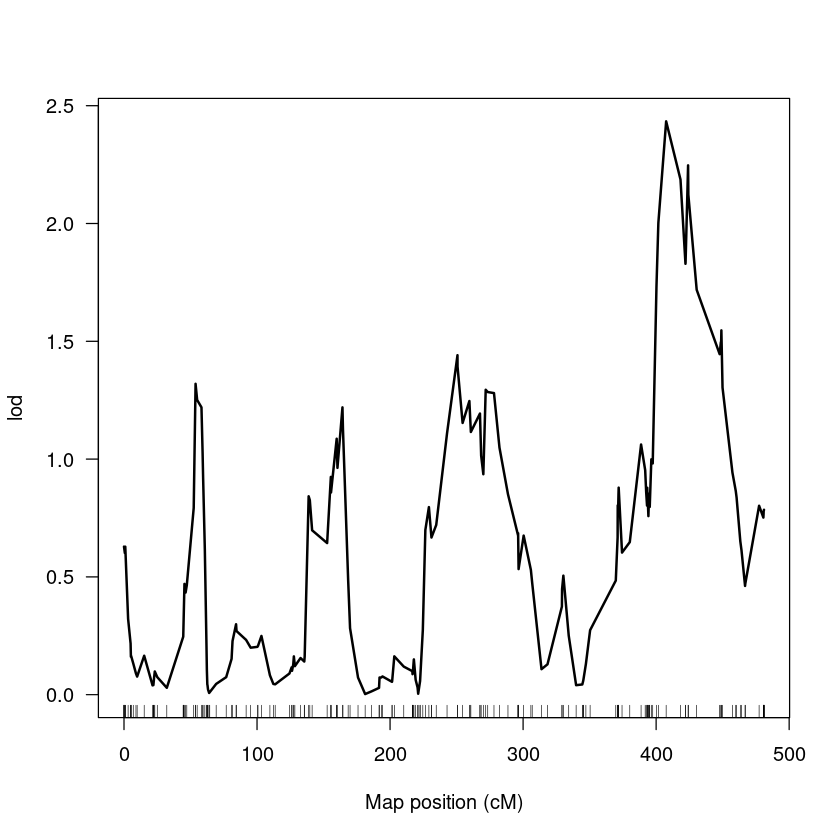

In [26]:
plot(out.acovar.Wahlberg_individs, chr=1)

In [40]:
ac2 <- pull.pheno(datf2.5, c("SEX", "GENERATION"))
#out.acovar.all <- scanone(datf2.5, pheno.col = 3, addcovar=ac)

In [ ]:
#plot(out.acovar.all, chr=30)
#xlim = c(200,500))

In [ ]:
#max(out.acovar.all[out.acovar.all$chr==1 & out.acovar.all$pos > 0  ,])


In [ ]:
#max(out.acovar.all[out.acovar.all$chr==30 & out.acovar.all$pos > 0 &  out.acovar.all$pos < 100,])


below are all peaks that are suggestive - i.e. significant at chrom 4 significance levels 5% after 10k permutations

In [ ]:
1-50	1	84.23679	8.864121
1-79	1	164.2182	3.324873
1-170	1	401.677	5.968426
2-98	2	216.027	2.714424
2-138	2	327.171	3.21146
3-77	3	141.6651	2.690947
4-15	4	49.49908	8.079024
6-4	6	0.02957916	2.799598
6-29	6	78.12438	4.528085
7-22	7	50.22548	14.21153
8-9	8	21.68429	3.058372
8-36	8	91.15566	3.121123
9-4	9	0.6851328	3.753586
10-16	10	20.48725	3.623719
12-9	12	7.497863	2.789307
13-8	13	4.298689	5.246326
14-12	14	22.88642	2.995042
16-10	16	8.951825	3.35403
21-9	21	3.066803	2.823419
23-1	23	1e-07	2.740163
27-7	27	7e-07	3.380714
29-6	29	6e-07	2.84695

In [27]:
chrom  <- c(1,1,1,2,2,3,4,6,6,7,8,8,9,10,12,13,14,16,21,23,27,29,29)

pos <- c(84.23679,164.2182,401.677,216.027,327.171,141.6651,49.49908,0.02957916,78.12438,50.22548,21.68429,91.15566,0.6851328,20.48725,7.497863,4.298689,22.88642,8.951825,3.066803,1.00E-07,7.00E-07,6.00E-07,5.00E-07)

In [28]:
chrom  <- c(1,1,1,2,2,3,4,6,6,7,8,8,9,10,12,13,14,16,21,23,27,29)

pos <- c(84.23679,164.2182,401.677,216.027,327.171,141.6651,49.49908,0.02957916,78.12438,50.22548,21.68429,91.15566,0.6851328,20.48725,7.497863,4.298689,22.88642,8.951825,3.066803,1.00E-07,7.00E-07,6.00E-07)

In [100]:
Wahlberg_individs <- est.rf(Wahlberg_individs)
#datf2.4_tst <- markerlrt(datf2.4)
genmap <- est.map(Wahlberg_individs, error.prob=0.005)


ERROR: Error in as.data.frame.default(x[[i]], optional = TRUE): cannot coerce class ‘c("1" = "A")’ to a data.frame


In [102]:
#Wahlberg_individs <- replace.map(Wahlberg_individs, genmap)

Wahlberg_individs <- calc.genoprob(Wahlberg_individs, step=1)
Wahlberg_individs <- calc.genoprob(Wahlberg_individs, step=0, off.end = 0)

In [103]:
qtls_WBind <- makeqtl(Wahlberg_individs, chr = chrom, pos = pos, what = 'prob')

In [104]:
qtls <- makeqtl(datf2.5, chr = chrom, pos = pos, what = 'prob')

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


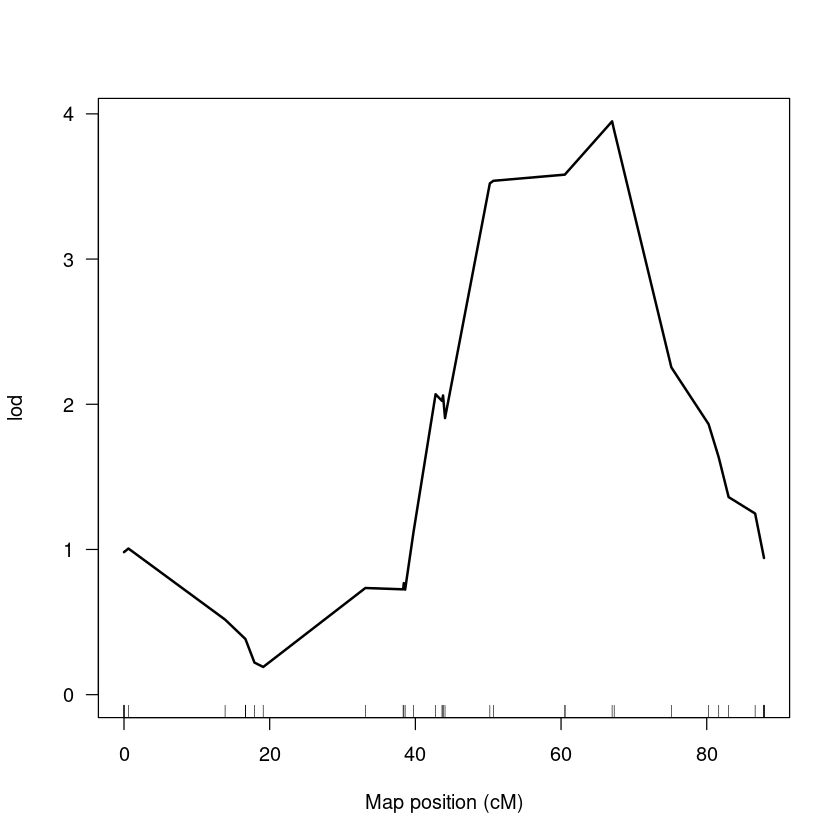

In [105]:
plot(out.acovar.Wahlberg_individs, chr=7)

In [106]:
fit_sugg_WB <- fitqtl(Wahlberg_individs, pheno.col = 3, qtl = qtls_WBind, covar = ac, get.ests=TRUE)

fit_sugg <- fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests=TRUE)

Warning message in fitqtl(Wahlberg_individs, pheno.col = 3, qtl = qtls_WBind, covar = ac, :
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 55 individuals with missing phenotypes.
”
Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2, get.ests = TRUE):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


In [107]:
summary(fit_sugg_WB)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 784 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 + Q12 
                    + Q13 + Q14 + Q15 + Q16 + Q17 + Q18 + Q19 + Q20 + Q21 + Q22 
                    + pull.pheno.Wahlberg_individs..c..SEX... 

       df       SS        MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model  45  6930946 154021.03 49.89021 25.40168            0         0
Error 738 20354443  27580.55                                         
Total 783 27285389                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
                                        df Type III SS      LOD     %var
1@84.2                                   2       33859  0.28296  0.12409
1@164.2                                  2       74667  0.62337  0.27365
1@401.7                              

In [108]:
summary(fit_sugg)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 + Q12 
                    + Q13 + Q14 + Q15 + Q16 + Q17 + Q18 + Q19 + Q20 + Q21 + Q22 
                    + SEX + GENERATION 

        df        SS        MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   46  27013795 587256.42 192.1559 25.02107            0         0
Error 3026  80950391  26751.62                                         
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS      LOD     %var F value Pvalue(Chi2) Pvalue(F)    
1@84.2      2      610967   5.0174  0.56590  11.419        0.000  1.15e-05 ***
1@164.2     2      290293   2.3887  0.26888   5.426        0.004  0.004445 ** 
1@401.7     2      516508   4.244

In [109]:
save.image(file = "20201117_nodens_wahlberg.Rdata")

# 20201117 Investigate Effect of marker density on Effectsize and %var explained

In [110]:
# load data - which bins have a Wahlberg 2009 marker?

Wahlberg_bins = read.table('../../../../chicken-assoc-vis/data/20201117_all_bins_with_WB_marker.csv', sep = ',')

###  make two subsets: one with all Individuals at Wahlberg resolution, one with only wahlberg individuals and Wahlberg resolution

In [111]:

WB_markers_all <- pull.markers(datf2.5,Wahlberg_bins$V2 )
WB_markers_WBind <- pull.markers(Wahlberg_individs, Wahlberg_bins$V2 )

Warning message in pull.markers(datf2.5, Wahlberg_bins$V2):
“Some markers couldn't be found: 0 20-13”
Warning message in pull.markers(Wahlberg_individs, Wahlberg_bins$V2):
“Some markers couldn't be found: 0 20-13”


### reestimate some stuff for WB_markers_all(individs)

In [112]:
WB_markers_all <- est.rf(WB_markers_all)

In [ ]:
#genmap <- est.map(WB_markers_all, error.prob=0.005)
#WB_markers_all <- replace.map(WB_markers_all, genmap)


In [114]:
WB_markers_all <- calc.genoprob(WB_markers_all, step=1)
WB_markers_all <- calc.genoprob(WB_markers_all, step=0, off.end = 0)

In [115]:
# modifying the list of qtls to account for the fact that Chromosome rank29 is missing in the Wahlberg markers!
chromWBmark  <- c(1,1,1,2,2,3,4,6,6,7,8,8,9,10,12,13,14,16,21,23,27)

posWBmark <- c(84.23679,164.2182,401.677,216.027,327.171,141.6651,49.49908,0.02957916,78.12438,50.22548,21.68429,91.15566,0.6851328,20.48725,7.497863,4.298689,22.88642,8.951825,3.066803,1.00E-07,7.00E-07)

In [116]:
qtls_WBmark_all <- makeqtl(WB_markers_all, chr = chromWBmark, pos = posWBmark, what = 'prob')
fit_sugg_WBmark_all <- fitqtl(WB_markers_all, pheno.col = 3, qtl = qtls_WBmark_all, covar = ac2, get.ests=TRUE)


Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in fitqtl(WB_markers_all, pheno.col = 3, qtl = qtls_WBmark_all, :
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


In [117]:
#summary(fit_sugg_WBmark_all)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 + Q12 
                    + Q13 + Q14 + Q15 + Q16 + Q17 + Q18 + Q19 + Q20 + Q21 + SEX 
                    + GENERATION 

        df        SS        MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   44  25561290 580938.40 180.2887 23.67571            0         0
Error 3028  82402897  27213.64                                         
Total 3072 107964187                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
           df Type III SS      LOD     %var F value Pvalue(Chi2) Pvalue(F)    
1@76.8      2      542699   4.3803  0.50267   9.971        0.000  4.83e-05 ***
1@164.6     2      283146   2.2890  0.26226   5.202        0.005  0.005553 ** 
1@407.5     2      639433   5.1581  0.5

In [118]:
save.image(file = "20201118_nodens_wahlberg.Rdata")

In [119]:
WB_markers_WBind <- est.rf(WB_markers_WBind)

In [120]:
genmap <- est.map(WB_markers_WBind, error.prob=0.005)
WB_markers_WBind <- replace.map(WB_markers_WBind, genmap)


In [121]:



WB_markers_WBind <- calc.genoprob(WB_markers_WBind, step=1)
WB_markers_WBind <- calc.genoprob(WB_markers_WBind, step=0, off.end = 0)

In [122]:
qtls_WBmark_WBind <- makeqtl(WB_markers_WBind, chr = chromWBmark, pos = posWBmark, what = 'prob')
fit_sugg_WBmark_WBind <- fitqtl(WB_markers_WBind, pheno.col = 3, qtl = qtls_WBmark_WBind, covar = ac, get.ests=TRUE)


Warning message in fitqtl(WB_markers_WBind, pheno.col = 3, qtl = qtls_WBmark_WBind, :
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 55 individuals with missing phenotypes.
”


In [136]:
ac_wb_wb <-  pull.pheno(WB_markers_WBind, c("SEX"))

out.hk.wbmrk_wb_ind <- scanone(WB_markers_WBind, method = 'hk', addcovar = ac_wb_wb, pheno.col = 3)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 55 individuals with missing phenotypes.
”


In [137]:
ac_wb_all <- pull.pheno(Wahlberg_individs, c("SEX"))

out.hk.wbmrk_all <- scanone(Wahlberg_individs, method = 'hk', addcovar = ac_wb_all, pheno.col = 3)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 55 individuals with missing phenotypes.
”


In [140]:
ac_all_all <-  pull.pheno(datf2.5, c("SEX", 'GENERATION'))

out.hk.all_all <- scanone(datf2.5, method = 'hk', addcovar = ac_all_all, pheno.col = 3)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”


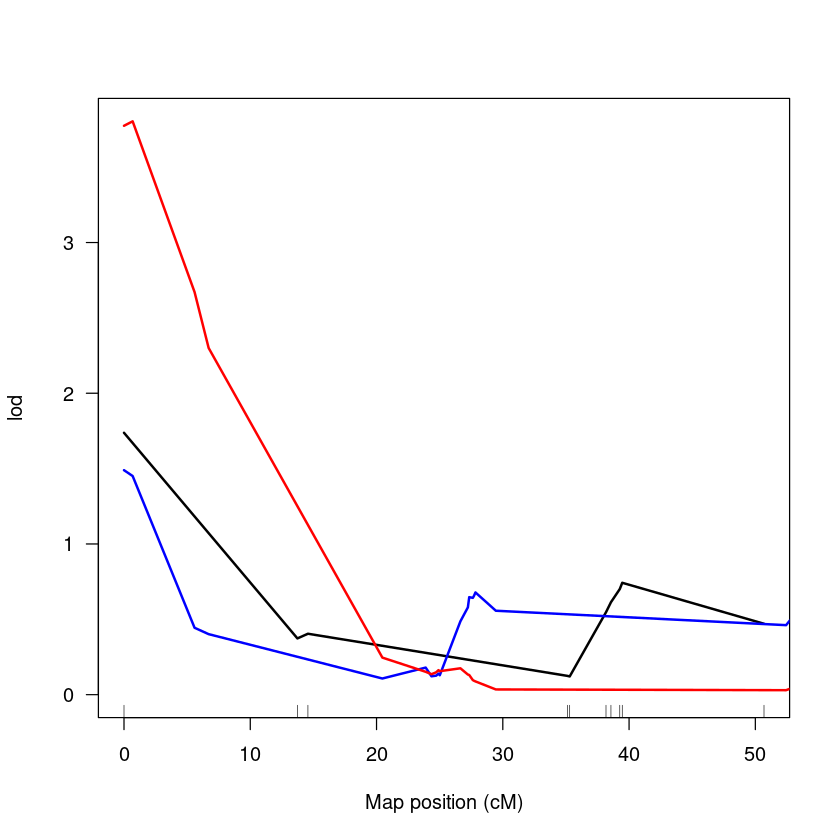

In [144]:
plot(out.hk.wbmrk_wb_ind,out.hk.wbmrk_all,out.hk.all_all, chr=9)


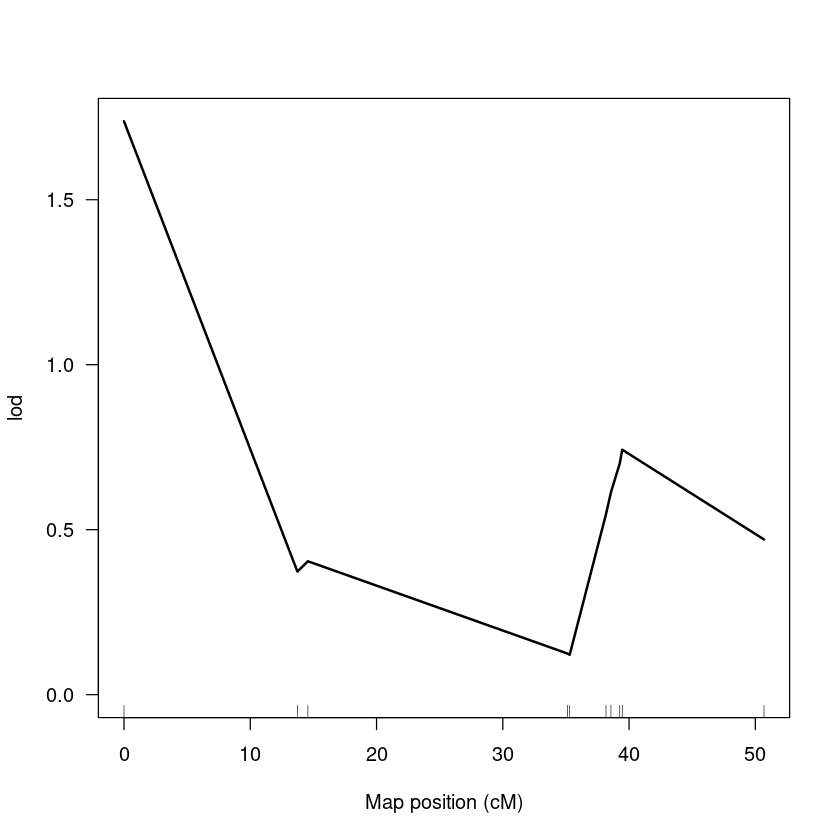

In [145]:
plot(out.hk.wbmrk_wb_ind, chr=9)

In [157]:
test <- pull.map(WB_markers_WBind)

test2 <- pull.map(WB_markers_all)
test3 <- pull.map(datf2.5)

In [156]:
test2['8']

     8-7     8-16     8-23     8-25     8-27     8-28 
18.85007 31.51179 46.77133 59.71774 60.31981 63.57202 

In [158]:
test3['8']

       8-0        8-1        8-2        8-3        8-4        8-5        8-6 
 0.0000000  0.0000001  0.0000002  0.0000003  0.9350173 17.0699880 18.0460276 
       8-7        8-8        8-9       8-10       8-11       8-12       8-13 
18.8500724 21.5698515 21.6842869 25.8401836 25.8401837 29.6432127 30.8412752 
      8-14       8-15       8-16       8-17       8-18       8-19       8-20 
31.4070199 31.4070200 31.5117905 33.2124394 45.3476078 45.6344692 45.8105933 
      8-21       8-22       8-23       8-24       8-25       8-26       8-27 
46.2587677 46.7164576 46.7713294 54.8871424 59.7177370 59.8027607 60.3198146 
      8-28       8-29       8-30       8-31       8-32       8-33       8-34 
63.5720160 64.1692121 65.9077942 82.8130330 90.7505688 91.1556603 91.1556604 
      8-35       8-36       8-37 
91.1556605 91.1556606 91.1556607 

In [154]:
test['8']

     8-7     8-16     8-23     8-25     8-27     8-28 
18.85007 27.92656 40.39150 51.84492 54.59477 55.70993 

In [124]:
save.image(file = "20201118_nodens_wahlberg.Rdata")

# remove F8's to look at effect sizes

In [ ]:
F2 = datf2.5$pheno['GENERATION'] ==2
F3 = datf2.5$pheno['GENERATION'] ==3
F4 = datf2.5$pheno['GENERATION'] ==4
F5 = datf2.5$pheno['GENERATION'] ==5
F6 = datf2.5$pheno['GENERATION'] ==6
F7 = datf2.5$pheno['GENERATION'] ==7
F8 = datf2.5$pheno['GENERATION'] ==8
F9 = datf2.5$pheno['GENERATION'] ==9
F10 = datf2.5$pheno['GENERATION'] ==10
F11 = datf2.5$pheno['GENERATION'] ==11
F13 = datf2.5$pheno['GENERATION'] ==13
F14 = datf2.5$pheno['GENERATION'] ==14
F15 = datf2.5$pheno['GENERATION'] ==15

In [ ]:
all_but_f8 = as.logical(F2+F3+F4+F5+F6+F7+F9+F10+F11+F13+F14+F15)

In [ ]:
all_butf8_subs = subset(datf2.5, ind = all_but_f8)
acnoF8 <- pull.pheno(all_butf8_subs, c("SEX", 'GENERATION'))
out.acovar.noF8 <- scanone(all_butf8_subs, pheno.col = 3, addcovar=acnoF8)


In [ ]:
qtls_noF8 <- makeqtl(all_butf8_subs, chr = chrom, pos = pos, what = 'prob')

In [ ]:
fit_sugg_noF8 <- fitqtl(all_butf8_subs, pheno.col = 3, qtl = qtls_noF8, covar = acnoF8, get.ests=TRUE)

In [ ]:
summary(fit_sugg_noF8)

In [ ]:
write.csv(fit_sugg_noF8$ests$ests, '20201111_fit_sugg_nof8_ests.csv')

In [ ]:
write.csv(fit_sugg$ests$ests, '20201111_fit_sugg_ests.csv')